## 00. 사전작업

In [3]:
!pip install wordcloud

In [4]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 15.1MB/s 
     |████████████████████████████████| 3.6MB 31.1MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [5]:
import matplotlib as mpl              # 기본 설정 만지는 용도
import matplotlib.pyplot as plt       # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [8]:
from gensim import corpora
from gensim import models

In [6]:
### 나눔 고딕 설치
!apt-get update -qq    # -qq 로그를 최소한으로 하여 설치를 업데이트 
!apt-get install fonts-nanum*  -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [7]:
# !ls -ltr /usr/share/fonts/truetype
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [113]:
doc_ko = open("경향_동아_조선_한겨레.txt").read()
doc_ko

'\ufeff금태섭 “민주당이 검찰처럼 나올 줄은 몰랐다”\n"김종인 첫 의총에 참석해 “너무 시비걸지 말고 협력해달라”"\n"[단독]민주당 폐기된 20대 1호 법안 ‘남북 접경지에 경제특구’ 재추진"\n"‘평화의 새’ 날갯짓만 30년…정부 ‘5·24 족쇄’부터 풀어주길"\n문 대통령 “G7 초청에 감사…기꺼이 응할 것”\n"문 대통령 트럼프와 통화 “G7 초청 응하겠다”"\n"윤미향 ‘나비 배지’ 달고 국회 등원…여당 엄호 속 ‘소명 부족’ 비판도"\n증거 없이 의혹 제기만 하는 통합당…윤미향에 ‘씨’ 지칭\n여야 원구성 놓고 줄다리기…독주·발목잡기 ‘구태’ 재연되나\n책 들고…운동화 신고…노동자와 점심…‘첫 등원’의 정치학\n문 대통령 “디지털·그린 뉴딜 두 축으로 선도국가 도약”\n미 한인 상점 피해 잇따라…LA 폭동 ‘악몽’ 재연 우려\n"일 수출규제 철회 요구 ‘묵살’…정부 WTO 제소 카드 꺼내나"\n"“우리 경제에 적지 않은 부담” 문 대통령 미·중 갈등 우려"\n김종인 “진보보다 앞서는 진취적 정당 만들겠다”\n조직 정비 공들이는 여권 잠룡들 “바닥을 다져라”\n정의당 혁신위 “시민 의견 수렴” 환골탈태 나서\n"김종인 비대위 민주당 뛰어넘는 ‘변화’ 예고?"\n"통합당 “윤미향 의혹만 더 확정…증빙자료 없으면 횡령”"\n"당선인 아닌 ‘의원’ 윤미향 의혹 뜨면 적극 해명 ‘강공’"\n"초선들의 첫날 지역구 청소 돕고 공단 찾고…“약자 위해 목소리 낼 것”"\n"여 “단독 개원” 압박 야 “신의 깨지 마”…벌써부터 ‘덜컹’"\n트럼프 “G7 회의에 한국도 초청”…반중 연합군 늘리기 나서\n느닷없이 날아온 초청장…정부 “미국 측과 협의” 신중\n슈퍼 여당·과반의 초선…‘전대미문의 국회’ 될까\n"여상규 “이제 ‘버럭’ 내려놓고 농부로 살 것” [굿바이 여의도 그리고 다시 시작합니다 (5)]"\n‘문심’ 위주…청 신임 비서관 7명 내정\n"“전작권 전환 위한 검증” “연합대비태세 점검 우선”…한·미 이번엔 연합훈련 방식 이견"\n의안접수센터 앞에서 

In [114]:
import konlpy
from konlpy.tag import Kkma

kkma = Kkma()
docs = doc_ko.split('\n')
type(docs)

list

In [115]:
print(docs)

['\ufeff금태섭 “민주당이 검찰처럼 나올 줄은 몰랐다”', '"김종인 첫 의총에 참석해 “너무 시비걸지 말고 협력해달라”"', '"[단독]민주당 폐기된 20대 1호 법안 ‘남북 접경지에 경제특구’ 재추진"', '"‘평화의 새’ 날갯짓만 30년…정부 ‘5·24 족쇄’부터 풀어주길"', '문 대통령 “G7 초청에 감사…기꺼이 응할 것”', '"문 대통령 트럼프와 통화 “G7 초청 응하겠다”"', '"윤미향 ‘나비 배지’ 달고 국회 등원…여당 엄호 속 ‘소명 부족’ 비판도"', '증거 없이 의혹 제기만 하는 통합당…윤미향에 ‘씨’ 지칭', '여야 원구성 놓고 줄다리기…독주·발목잡기 ‘구태’ 재연되나', '책 들고…운동화 신고…노동자와 점심…‘첫 등원’의 정치학', '문 대통령 “디지털·그린 뉴딜 두 축으로 선도국가 도약”', '미 한인 상점 피해 잇따라…LA 폭동 ‘악몽’ 재연 우려', '"일 수출규제 철회 요구 ‘묵살’…정부 WTO 제소 카드 꺼내나"', '"“우리 경제에 적지 않은 부담” 문 대통령 미·중 갈등 우려"', '김종인 “진보보다 앞서는 진취적 정당 만들겠다”', '조직 정비 공들이는 여권 잠룡들 “바닥을 다져라”', '정의당 혁신위 “시민 의견 수렴” 환골탈태 나서', '"김종인 비대위 민주당 뛰어넘는 ‘변화’ 예고?"', '"통합당 “윤미향 의혹만 더 확정…증빙자료 없으면 횡령”"', '"당선인 아닌 ‘의원’ 윤미향 의혹 뜨면 적극 해명 ‘강공’"', '"초선들의 첫날 지역구 청소 돕고 공단 찾고…“약자 위해 목소리 낼 것”"', '"여 “단독 개원” 압박 야 “신의 깨지 마”…벌써부터 ‘덜컹’"', '트럼프 “G7 회의에 한국도 초청”…반중 연합군 늘리기 나서', '느닷없이 날아온 초청장…정부 “미국 측과 협의” 신중', '슈퍼 여당·과반의 초선…‘전대미문의 국회’ 될까', '"여상규 “이제 ‘버럭’ 내려놓고 농부로 살 것” [굿바이 여의도 그리고 다시 시작합니다 (5)]"', '‘문심’ 위주…청 신임 비서관 7명 내정', '"“전작권 전환

In [116]:
# 불용어 제거
stoplist = ('.!?, 것, 이, 고, 전, 연, 군, 의, 수, 등, 비, 안, 명, 선, 중, 첫, 때문, 경향신문, 동아일보, 조선일보, 한겨레, 오늘, 뉴스, 종합, 속보, 단독, 선택, 포토, 미아, 인터뷰')

# 단어 리스트 만들기
texts = [
    [word for word in document.split() if word not in stoplist]
    for document in docs]
texts

[['\ufeff금태섭', '“민주당이', '검찰처럼', '나올', '줄은', '몰랐다”'],
 ['"김종인', '의총에', '참석해', '“너무', '시비걸지', '말고', '협력해달라”"'],
 ['"[단독]민주당', '폐기된', '20대', '1호', '법안', '‘남북', '접경지에', '경제특구’', '재추진"'],
 ['"‘평화의', '새’', '날갯짓만', '30년…정부', '‘5·24', '족쇄’부터', '풀어주길"'],
 ['대통령', '“G7', '초청에', '감사…기꺼이', '응할', '것”'],
 ['"문', '대통령', '트럼프와', '통화', '“G7', '초청', '응하겠다”"'],
 ['"윤미향', '‘나비', '배지’', '달고', '국회', '등원…여당', '엄호', '‘소명', '부족’', '비판도"'],
 ['증거', '없이', '의혹', '제기만', '하는', '통합당…윤미향에', '‘씨’', '지칭'],
 ['여야', '원구성', '놓고', '줄다리기…독주·발목잡기', '‘구태’', '재연되나'],
 ['책', '들고…운동화', '신고…노동자와', '점심…‘첫', '등원’의', '정치학'],
 ['대통령', '“디지털·그린', '뉴딜', '두', '축으로', '선도국가', '도약”'],
 ['한인', '상점', '피해', '잇따라…LA', '폭동', '‘악몽’', '재연', '우려'],
 ['"일', '수출규제', '철회', '요구', '‘묵살’…정부', 'WTO', '제소', '카드', '꺼내나"'],
 ['"“우리', '경제에', '적지', '않은', '부담”', '대통령', '미·중', '갈등', '우려"'],
 ['김종인', '“진보보다', '앞서는', '진취적', '정당', '만들겠다”'],
 ['조직', '정비', '공들이는', '여권', '잠룡들', '“바닥을', '다져라”'],
 ['정의당', '혁신위', '“시민', '의견', '수렴”', '환골탈태', '나서'],
 ['"김종인', '비대위', '민주당'

단어 리스트에서 한글만 추출

In [117]:
import re

hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자
result = []
for i in range(len(texts)):
  x = []
  for j in range(len(texts[i])):
    a = hangul.sub('', texts[i][j]) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
    x.append(a)
  result.append(x)
result

[['금태섭', '민주당이', '검찰처럼', '나올', '줄은', '몰랐다'],
 ['김종인', '의총에', '참석해', '너무', '시비걸지', '말고', '협력해달라'],
 ['단독민주당', '폐기된', '대', '호', '법안', '남북', '접경지에', '경제특구', '재추진'],
 ['평화의', '새', '날갯짓만', '년정부', '', '족쇄부터', '풀어주길'],
 ['대통령', '', '초청에', '감사기꺼이', '응할', '것'],
 ['문', '대통령', '트럼프와', '통화', '', '초청', '응하겠다'],
 ['윤미향', '나비', '배지', '달고', '국회', '등원여당', '엄호', '소명', '부족', '비판도'],
 ['증거', '없이', '의혹', '제기만', '하는', '통합당윤미향에', '씨', '지칭'],
 ['여야', '원구성', '놓고', '줄다리기독주발목잡기', '구태', '재연되나'],
 ['책', '들고운동화', '신고노동자와', '점심첫', '등원의', '정치학'],
 ['대통령', '디지털그린', '뉴딜', '두', '축으로', '선도국가', '도약'],
 ['한인', '상점', '피해', '잇따라', '폭동', '악몽', '재연', '우려'],
 ['일', '수출규제', '철회', '요구', '묵살정부', '', '제소', '카드', '꺼내나'],
 ['우리', '경제에', '적지', '않은', '부담', '대통령', '미중', '갈등', '우려'],
 ['김종인', '진보보다', '앞서는', '진취적', '정당', '만들겠다'],
 ['조직', '정비', '공들이는', '여권', '잠룡들', '바닥을', '다져라'],
 ['정의당', '혁신위', '시민', '의견', '수렴', '환골탈태', '나서'],
 ['김종인', '비대위', '민주당', '뛰어넘는', '변화', '예고'],
 ['통합당', '윤미향', '의혹만', '더', '확정증빙자료', '없으면', '횡령'],
 ['당선인', '아닌', '의

## 01. 사전(dictionary)과 말뭉치(corpus) 만들기

### 사전만들기
* dictionary는 bag-of-words를 이용하여 생성된 단어와 그 발생횟수를 나열

In [118]:
dictionary = corpora.Dictionary(result)
dictionary

### 코퍼스 만들기(벡터화)
*  doc2bow()는 unique한 결과에서 단어의 출연횟수를 계산
* 문서마다 단어ID와 그 발생빈도를 갖는 튜플 생성


In [119]:
corpus = [dictionary.doc2bow(text) for text in texts]
print ('corpus : {}'.format(corpus))

corpus : [[(0, 1), (2, 1), (5, 1)], [(8, 1), (9, 1), (10, 1), (11, 1)], [(17, 1), (19, 1), (20, 1)], [(23, 1)], [(31, 1), (32, 1), (33, 1)], [(31, 1), (36, 1), (37, 1), (38, 1)], [(39, 1), (41, 1), (47, 1)], [(50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (56, 1)], [(58, 1), (59, 1), (60, 1), (61, 1)], [(67, 1), (68, 1)], [(31, 1), (69, 1), (71, 1), (73, 1), (74, 1)], [(75, 1), (77, 1), (79, 1), (80, 1), (81, 1), (82, 1)], [(85, 1), (86, 1), (88, 1), (89, 1), (90, 1)], [(31, 1), (91, 1), (92, 1), (95, 1), (97, 1)], [(6, 1), (99, 1), (100, 1), (102, 1)], [(103, 1), (106, 1), (107, 1), (108, 1), (109, 1)], [(110, 1), (113, 1), (114, 1), (115, 1), (116, 1)], [(117, 1), (118, 1), (120, 1)], [(122, 1), (123, 1), (124, 1)], [(48, 1), (51, 1), (130, 1), (131, 1), (133, 1), (134, 1)], [(135, 1), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1), (142, 1), (143, 1)], [(146, 1), (151, 1), (152, 1)], [(110, 1), (154, 1), (155, 1), (157, 1), (158, 1), (159, 1)], [(160, 1), (161, 1), (163, 1), (165, 1

## 02. 모델 구축
* LDA 모델 정의 : 기본적으로 corpus, num_topics, id2word 로 정의해야 한다.
* num_topics = 주제 갯수
* random_state 지정을 통해 임의의 값을 적용

In [127]:
lda = models.ldamodel.LdaModel( corpus=corpus,
        id2word=dictionary,
        num_topics=2,
        random_state = 1)

## 03. 모델을 사용해 결과 출력

In [128]:
# 주제마다 출현 확률이 높은 단어 순으로 출력
for t in lda.show_topics():
  print(t)

(0, '0.013*"대통령" + 0.007*"한국당" + 0.004*"총선" + 0.003*"조국" + 0.003*"또" + 0.002*"청와대" + 0.002*"더" + 0.002*"통합당" + 0.002*"민주당" + 0.002*"논란"')
(1, '0.007*"민주당" + 0.004*"대통령" + 0.003*"총리" + 0.003*"국회" + 0.003*"한국당" + 0.003*"황교안" + 0.003*"의원" + 0.003*"협상" + 0.003*"김정은" + 0.003*"정의당"')


## 04. 워드클라우드로 시각화

In [122]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(background_color="white",
    max_words=2000,
    contour_width=3, contour_color='steelblue',
    font_path=path)

In [123]:
lda.num_topics

2

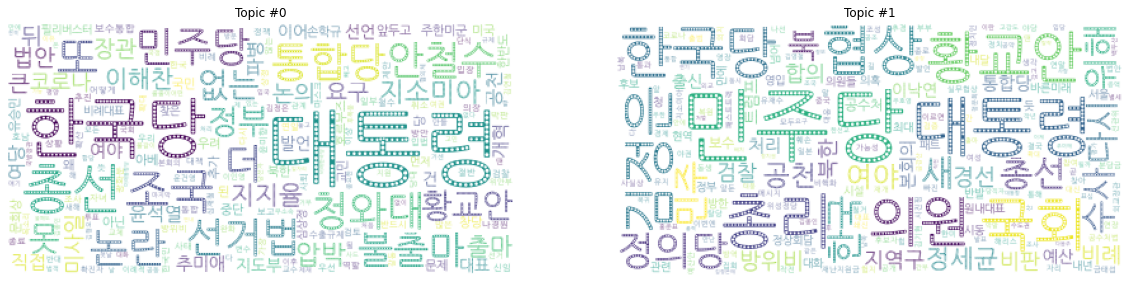

In [130]:
plt.figure(figsize=(20,30))
for t in range(lda.num_topics):
  plt.subplot(1,2,t+1)
  x = dict(lda.show_topic(t,200))
  im = wc.generate_from_frequencies(x)
  plt.imshow(im)
  plt.axis("off")
  plt.title("Topic #" + str(t))